In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data=pd.read_csv('/content/Netflix_Userbase.csv')

In [ ]:
data.head(30)

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
5,6,Premium,15,18-03-22,27-06-23,France,29,Female,Smart TV,1 Month
6,7,Standard,12,09-12-21,25-06-23,Brazil,46,Male,Tablet,1 Month
7,8,Basic,10,02-04-23,24-06-23,Mexico,39,Female,Laptop,1 Month
8,9,Standard,12,20-10-22,23-06-23,Spain,37,Male,Smartphone,1 Month
9,10,Premium,15,07-01-23,22-06-23,Italy,44,Female,Smart TV,1 Month


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [ ]:
data.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

In [ ]:
data['Plan Duration'] = data['Plan Duration'].str.extract('(\d+)').astype(float)

In [ ]:
X_revenue = data[['Age', 'Plan Duration', 'Subscription Type_Standard']]
X_feedback = data[['Age', 'Plan Duration', 'Subscription Type_Standard', 'Gender_Male']]

In [ ]:
data.describe()

,User ID,Monthly Revenue,Age,Plan Duration,Gender_Male,Subscription Type_Premium,Subscription Type_Standard
count,2500.00000,2500.000000,2500.000000,2500.0,2500.000000,2500.00000,2500.000000
mean,1250.50000,12.508400,38.795600,1.0,0.497200,0.29320,0.307200
std,721.83216,1.686851,7.171778,0.0,0.500092,0.45532,0.461425
min,1.00000,10.000000,26.000000,1.0,0.000000,0.00000,0.000000
25%,625.75000,11.000000,32.000000,1.0,0.000000,0.00000,0.000000
50%,1250.50000,12.000000,39.000000,1.0,0.000000,0.00000,0.000000
75%,1875.25000,14.000000,45.000000,1.0,1.000000,1.00000,1.000000
max,2500.00000,15.000000,51.000000,1.0,1.000000,1.00000,1.000000


Text(0, 0.5, 'Plan Duration')

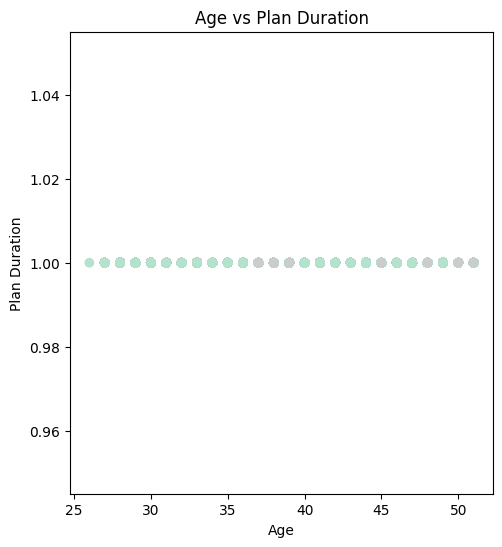

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(data['Age'], data['Plan Duration'], c=data['Subscription Type_Standard'],
cmap='Pastel2')
plt.title('Age vs Plan Duration')
plt.xlabel('Age')
plt.ylabel('Plan Duration')

Text(0, 0.5, 'Count')

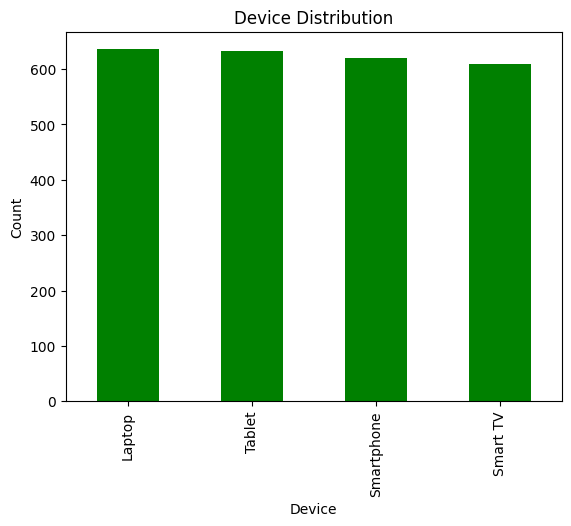

In [ ]:
plt.subplot(1, 1, 1)
device_counts = data['Device'].value_counts()
device_counts.plot(kind='bar', color='green')
plt.title('Device Distribution')
plt.xlabel('Device')
plt.ylabel('Count')

Text(0, 0.5, 'Frequency')

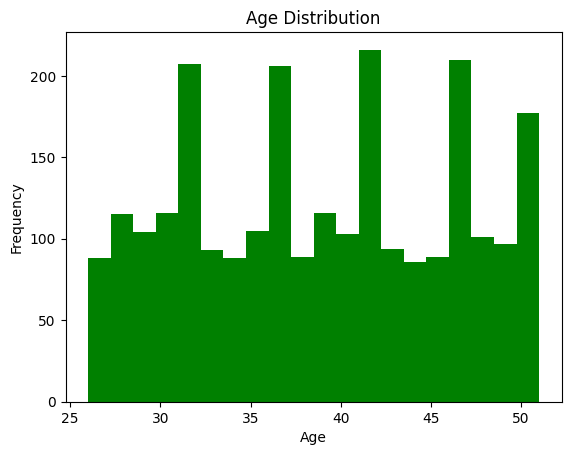

In [ ]:
plt.subplot(1, 1, 1)
plt.hist(data['Age'], bins=20, color='green')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [ ]:
X_train_rev, X_test_rev, y_train_rev, y_test_rev = train_test_split(X_revenue, data['Monthly Revenue'], test_size=0.2, random_state=42)

In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(X_train_rev, y_train_rev)

LinearRegression()

In [ ]:
y_pred_rev = linear_reg.predict(X_test_rev)
r2_rev = r2_score(y_test_rev, y_pred_rev)
rmse_rev = np.sqrt(mean_squared_error(y_test_rev, y_pred_rev))
print("Linear Regression Model Metrics:")
print(f"R-squared: {r2_rev}")
print(f"RMSE: {rmse_rev}")

Linear Regression Model Metrics:
R-squared: -0.007993277926992004
RMSE: 1.668602613142419


In [ ]:
data['Feedback'] = np.where(data['Monthly Revenue'] > data['Monthly Revenue'].median(), 1, 0)

In [ ]:
X_train_fb, X_test_fb, y_train_fb, y_test_fb = train_test_split(X_feedback, data['Feedback'], test_size=0.2, random_state=42)

In [ ]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train_fb, y_train_fb)

LogisticRegression()

In [ ]:
y_pred_fb = logistic_reg.predict(X_test_fb)
accuracy_fb = accuracy_score(y_test_fb, y_pred_fb)
precision_fb = precision_score(y_test_fb, y_pred_fb)
recall_fb = recall_score(y_test_fb, y_pred_fb)
f1_fb = f1_score(y_test_fb, y_pred_fb)
conf_matrix_fb = confusion_matrix(y_test_fb, y_pred_fb)
print("\nLogistic Regression Model Metrics:")
print(f"Accuracy: {accuracy_fb}")
print(f"Precision: {precision_fb}")
print(f"Recall: {recall_fb}")
print(f"F1 Score: {f1_fb}")
print("Confusion Matrix:")
print(conf_matrix_fb)


Logistic Regression Model Metrics:
Accuracy: 0.5
Precision: 0.4887459807073955
Recall: 0.6255144032921811
F1 Score: 0.5487364620938628
Confusion Matrix:
[[ 98 159]
 [ 91 152]]


In [ ]:
feature_importance = pd.DataFrame({'Feature': X_revenue.columns, 'Coefficient': linear_reg.coef_})
print("\nFeature Importance for Linear Regression Model:")
print(feature_importance)


Feature Importance for Linear Regression Model:
                      Feature  Coefficient
0                         Age    -0.008295
1               Plan Duration     0.000000
2  Subscription Type_Standard    -0.087212
